# 심부전 임상 기록 데이터셋 분석하기
### https://www.kaggle.com/andrewmvd/heart-failure-clinical-data
#### age : 연령
#### anaemia : 적혈구 또는 헤모글로빈의 감소 여부. 0이면 없음 1이면 있음
#### creatinine_phosphokinase : 혈액 내 CPK 효소 수치(mcg/L)
#### diabetes: 당뇨 여부. 0이면 없음 1이면 있음
#### ejection_fraction : 심장 수축시 혈액 방출 정도
#### high_blood_pressure : 고혈압 여부 0이면 없음 1이면 있음
#### platelets : 혈액 내 혈소판(kiloplatelets/mL)
#### serum_creatinine : 혈액 내 creatinine(mg/dL)
#### serum_sodium : 혈액 내 나트륨 농도(mEq/L)
#### sex : 0이면 여성, 1이면 남성
#### smoking : 0이면 비흡연자 1이면 흡연자
#### time : 심정지 발생 후 후속 기간(일)
#### DEATH_EVENT : 0이면 발생, 1이면 발생하지 않음

In [15]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns;

## 파일 읽어오기

In [2]:
df = pd.read_csv('./heart_failure_clinical_records_dataset.csv')

In [3]:
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


# 데이터 분석하기

#### null값은 없는 것으로 확인되었다.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


## 분산이 크게 나타난 feature를 확인해보자
#### 사실 이렇게보면 잘 모르겠다. 시각화를 통해서 분포를 알아보자

In [6]:
df.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


In [57]:
continuous_index = ['age', 'creatinine_phosphokinase', 'ejection_fraction', 'platelets', 'serum_creatinine', 'serum_sodium', 'time']
discrete_index = ['anaemia', 'diabetes', 'high_blood_pressure', 'sex', 'smoking', 'DEATH_EVENT']

## continuous한 값들을 시각화하자
### 대부분 고른 분포보다 한 쪽에 치우친 분포를 보여줬다.

In [135]:
palette = sns.color_palette('coolwarm', 8)

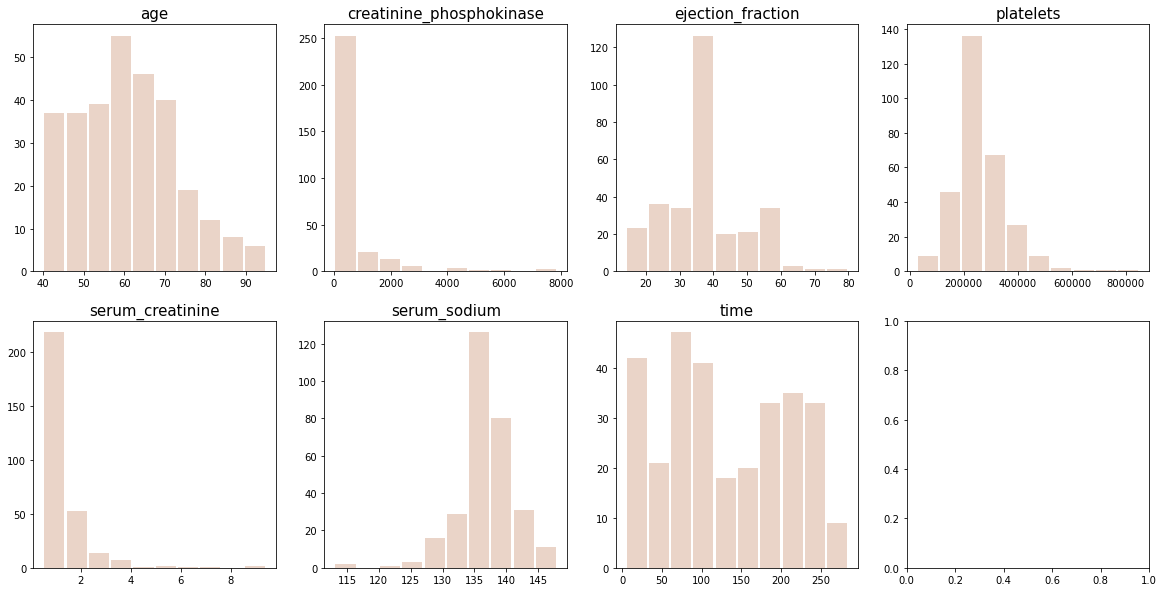

In [138]:
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(20, 10))
for index, col_name in enumerate(continuous_index):
    axes[index//4, index%4].set_title(col_name, size=15)
    axes[index//4, index%4].hist(df[col_name], rwidth=0.9, color=palette[4])
    
plt.show()

## discrete한 값들을 시각화

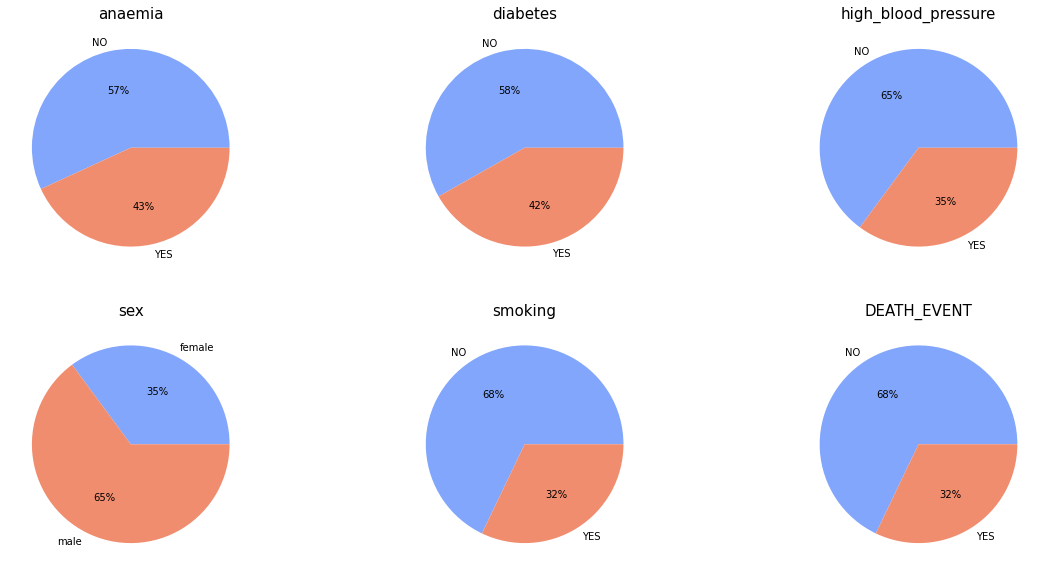

In [142]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(20, 10))
for index, col_name in enumerate(discrete_index):
    axes[index//3, index%3].set_title(col_name, size=15)
    if col_name == 'sex':
        axes[index//3, index%3].pie( [len(df[df[col_name]<0.5]), len(df[df[col_name]>0.5])], labels=['female', 'male'], colors=[palette[1], palette[6]], autopct='%.f%%')
    else:
        axes[index//3, index%3].pie( [len(df[df[col_name]<0.5]), len(df[df[col_name]>0.5])], labels=['NO', 'YES'], colors=[palette[1], palette[6]], autopct='%.f%%')
    
plt.show()

## 각 Feature들 사이의 correlation을 확인하자
#### DEATH_EVENT는 age, ejection_fraction, serum_creatinine, serum_sodium, time과 비교적 유의미한 관계를 보였다
#### 그중 time과는 밀접한 관계를 보였다.
#### 재미있게도 성별은 다른 feature들과는 큰 연관성을 보이지 않았지만 흡연과는 꽤나 높은 연관성을 보이는 것이 확인되었다

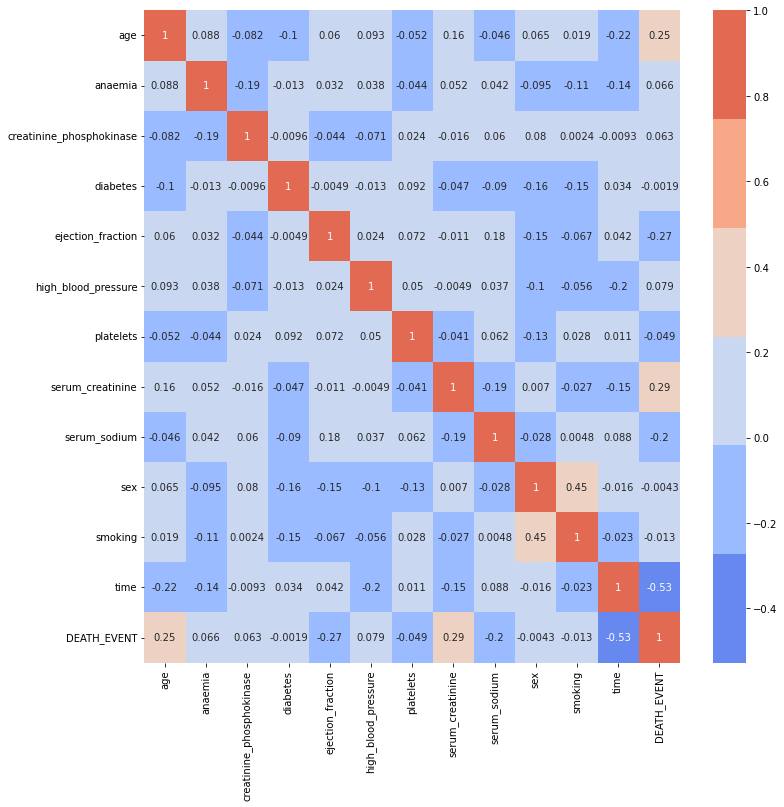

In [134]:
corr = df.corr()

plt.figure(figsize=(12,12))
sns.heatmap(corr, annot=True, cmap=sns.color_palette('coolwarm'))
plt.show()

## Time
#### 대부분 heart-failure가 발생하면, 250일 이내에 Death_event가 발생한다

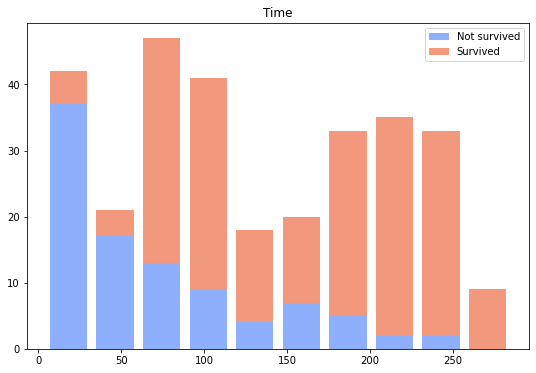

In [130]:
death_event_df = df[df['DEATH_EVENT']==1]
non_death_event_df = df[df['DEATH_EVENT']==0]

plt.figure(figsize=(9,6))
plt.title('Time')
plt.hist((death_event_df['time'], non_death_event_df['time']), label = ('Not survived', 'Survived'),
         color=[palette[1], palette[6]], alpha=0.9, rwidth=0.8, histtype='barstacked')
plt.legend()
plt.show()

## Serum_creatinine
#### death_event가 발생한 그룹에서 creatinine의 수치가 비교적 더 높게 나왔다

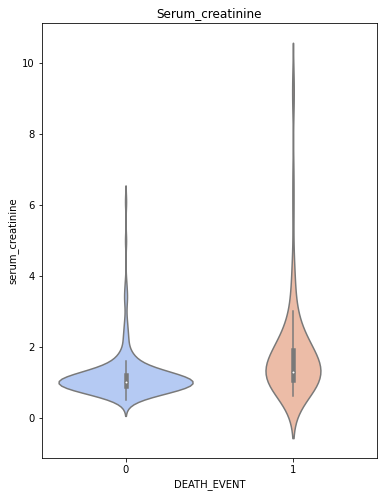

In [25]:
plt.figure(figsize=(6,8))
plt.title('Serum_creatinine')
sns.violinplot(x='DEATH_EVENT', y='serum_creatinine', data = df, palette='coolwarm')
plt.show()

## Serum_sodium
#### death_event가 발생한 그룹에서 creatinine의 수치가 비교적 더 높게 나왔다

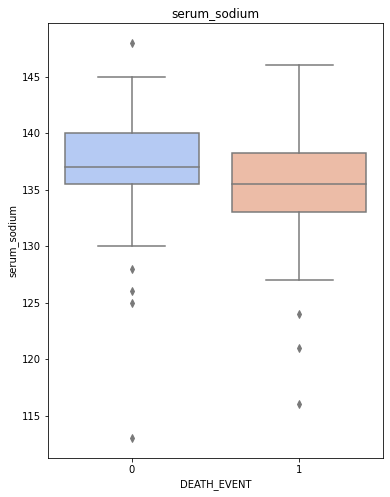

In [10]:
plt.figure(figsize=(6,8))
plt.title('serum_sodium')
sns.boxplot(x='DEATH_EVENT', y='serum_sodium', data = df, palette='coolwarm')
plt.show()

## 연령대별 death_event 빈도
#### 연령은 40대부터 시작하고 60대에 death_event가 많이 발생하는 것으로 확인된다

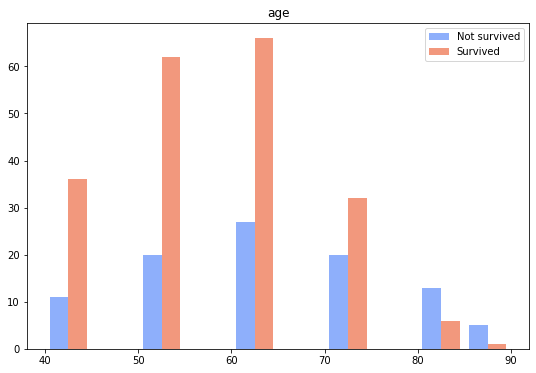

In [133]:
death_event_df = df[df['DEATH_EVENT']==1]
non_death_event_df = df[df['DEATH_EVENT']==0]

plt.figure(figsize=(9,6))
plt.title('age')
plt.hist((death_event_df['age']//10*10, non_death_event_df['age']//10*10),
         label = ('Not survived', 'Survived'), color=[palette[1], palette[6]], alpha=0.9)
plt.legend()
plt.show()

## ejection_fraction
#### 심장 수축시 혈액 방출 정도가 낮은 경우, DEATH_EVENT가 나타날 확률이 높았다

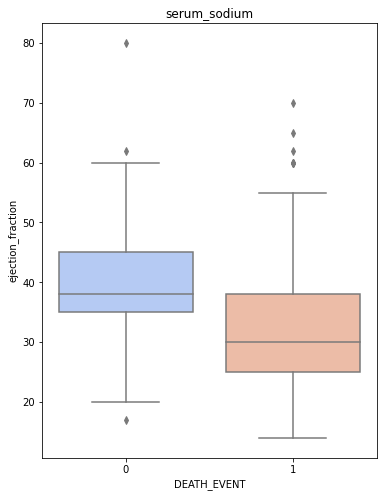

In [12]:
plt.figure(figsize=(6,8))
plt.title('serum_sodium')
sns.boxplot(x='DEATH_EVENT', y='ejection_fraction', data = df, palette='coolwarm')
plt.show()